In [27]:
# Bibliotecas para ler URL's através de "network protocols"
import urllib
import urllib.request
import csv
import codecs
import pandas as pd

# Informações de arquivo CSV com dados da base do Censo de Bureau sobre habitantes dos Estados Unidos
bureau_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
bureau_csv_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                      'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                      'hours_per_week', 'native_country', 'income']

# Abrir URL
http_response = urllib.request.urlopen(bureau_csv_url);

# Converter resposta 'http' em arquivo CSV
csv_file = csv.reader((line.replace(', ', ',') for line in codecs.iterdecode(http_response, 'utf-8')))

# Pegar os dados do arquivo CSV
csv_data = []

# a = 1

for line in csv_file:
#     if(a < 10):
        csv_data.append(line)
#         a += 1

# Passar os dados para uma tabela
bureau_table = pd.DataFrame(data = csv_data, columns = bureau_csv_columns)
# bureau_table.head(100)

In [28]:
# Definições de grupos do dataset do Censo de Bureau
workclass = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov',
             'Without-pay', 'Never-worked']
education = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc',
             '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']
marital_status = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed',
                  'Married-spouse-absent', 'Married-AF-spouse']
occupation = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty',
              'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving',
              'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
relationship = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']
race = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
sex = ['Female', 'Male']
native_country = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany',
                   'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China',
                   'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica',
                   'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic',
                   'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala',
                   'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago',
                   'Peru', 'Hong', 'Holand-Netherlands']
income = ['<=50K', '>50K']

group_definitions = {}
group_definitions['workclass'] = workclass
group_definitions['education'] = education
group_definitions['marital_status'] = marital_status
group_definitions['occupation'] = occupation
group_definitions['relationship'] = relationship
group_definitions['race'] = race
group_definitions['sex'] = sex
group_definitions['native_country'] = native_country
group_definitions['income'] = income

In [29]:
# Prepara e confere dados para começar a análise
convert_int = ['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss', 'hours-per-week']
groups_to_check = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                   'native_country', 'income']

# Função para converter elemento em int
def convert_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
        
# Função para converter elemento em str
def convert_to_str(c):
    if isinstance(c, str):
        return c
    else:
        try:
            str(c)
        except:
            return None

# Função para checar consistência de dados de acordo com as definições do Censo de Bureau
def check_info(k, group_index):
    group = groups_to_check[group_index]
    if(k in group_definitions[group]):
        return k
    else:
        return None

# Para cada coluna da tabela, faz para cada linha daquela coluna uma verificação de consistência e tipo
for column in bureau_table:
    if(column in convert_int):
        bureau_table[column] = bureau_table[column].apply(convert_to_int)
    if(column in groups_to_check):
        index = groups_to_check.index(column)
        bureau_table[column] = bureau_table[column].apply(convert_to_str)
        bureau_table[column] = bureau_table[column].apply(check_info, args=([index]))

In [30]:
bureau_table.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K


In [31]:
import array

gain_less_50_per_country = array.array('i', (0 for i in range(0, 2)))
gain_more_50_per_country = array.array('i', (0 for i in range(0, 2)))

for index, row in bureau_table.iterrows():
    country = row['native_country']
    gain = row['income']
    if((country in native_country) and (gain in income)):
        if(country == 'United-States'):
            index = 0
        else:
            index = 1
        if(gain == '<=50K'):
            gain_less_50_per_country[index] += 1
        else:
            gain_more_50_per_country[index] += 1
            
total_eua = gain_less_50_per_country[0] + gain_more_50_per_country[0]
total_outside = gain_less_50_per_country[1] + gain_more_50_per_country[1]
total = total_eua + total_outside


In [32]:
import numpy as np
import matplotlib.pyplot as plt


def function1():
    low_income = []
    low_income.append((gain_less_50_per_country[0] / total_eua) * 100)
    low_income.append((gain_less_50_per_country[1] / total_outside) * 100)

    high_income = []
    high_income.append((gain_more_50_per_country[0] / total_eua) * 100)
    high_income.append((gain_more_50_per_country[1] / total_outside) * 100)
    
    N = 2

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, low_income, width, color='r')

    rects2 = ax.bar(ind + width, high_income, width, color='y')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('People')
    ax.set_title('Population by native country and income')
    ax.set_xticks(ind + width / 2)
    # ax.set_yticks(100)
    ax.set_xticklabels(['U.S.', 'Other Countries'])

    ax.legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.show()

In [33]:
def function2():
    low_income = []
    low_income.append((gain_less_50_per_country[0] / total) * 100)
    low_income.append((gain_less_50_per_country[1] / total) * 100)

    high_income = []
    high_income.append((gain_more_50_per_country[0] / total) * 100)
    high_income.append((gain_more_50_per_country[1] / total) * 100)

    N = 2

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, low_income, width, color='r')

    rects2 = ax.bar(ind + width, high_income, width, color='y')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('People')
    ax.set_title('Population by native country and income')
    ax.set_xticks(ind + width / 2)
    # ax.set_yticks(100)
    ax.set_xticklabels(['U.S.', 'Other Countries'])

    ax.legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.show()
    
    

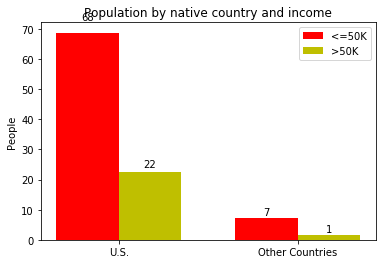

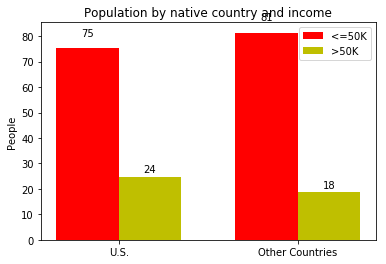

In [34]:
function2()
function1()

In [35]:
bureau_table.head(100)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K
6,49.0,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45,United-States,>50K
8,31.0,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50,United-States,>50K
9,42.0,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40,United-States,>50K


In [45]:
per_marital = {}
categories = ['9', '13', '14', '16']
for status in marital_status:
    per_marital[status] = array.array('i', (0 for i in range(0, len(categories))))


for index, row in bureau_table.iterrows():
    education = row['education_num']
    marital = row['marital_status']
    if((education in categories) and (marital in marital_status)):
        index = categories.index(education)
        per_marital[marital][index] += 1
            
per_marital

{'Divorced': array('i', [1613, 546, 233, 33]),
 'Married-AF-spouse': array('i', [13, 4, 0, 0]),
 'Married-civ-spouse': array('i', [4845, 2768, 1003, 286]),
 'Married-spouse-absent': array('i', [121, 68, 17, 7]),
 'Never-married': array('i', [3089, 1795, 404, 73]),
 'Separated': array('i', [406, 92, 25, 7]),
 'Widowed': array('i', [414, 82, 41, 7])}

In [83]:
def function3():
    
    N = len(categories)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    data = {}
    a = 0
    fig, ax = plt.subplots()
    for i in range(0, len(marital_status)):
        if(i%2 == 0):
            color = 'r'
        else:
            color = 'g'
        data[i] = ax.bar(a, per_marital[marital_status[i]], width, color=color)
        a += 2

    # add some text for labels, title and axes ticks
#     ax.set_ylabel('People')
#     ax.set_title('Population by native country and income')
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12])
#     ax.set_yticks(100)
    ax.set_xticklabels(marital_status)

#     ax.legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    for i in range(0, len(marital_status)):
        autolabel(data[i])

    plt.show()
    
    

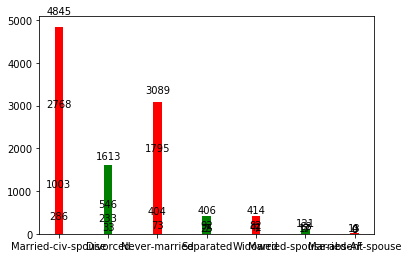

In [84]:
function3()